In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_train = dset.MNIST('',train=True,transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = mnist_train = dset.MNIST('',train=False,transform=transforms.ToTensor(), target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


mnist_train 길이: 10000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 7


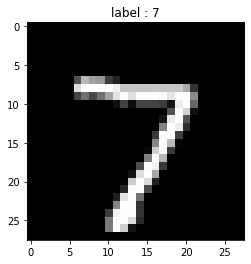

In [3]:
print("mnist_train 길이:",len(mnist_train))
print('mnist_test 길이:',len(mnist_test))

img,label = mnist_train.__getitem__(0)
print('image data 형태:',img.size())
print('label:',label)

plt.title('label : %d'%label)
plt.imshow(img[0],cmap='gray')
plt.show()

7
torch.Size([1, 28, 28])
7


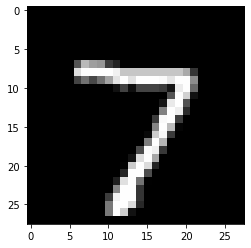

2


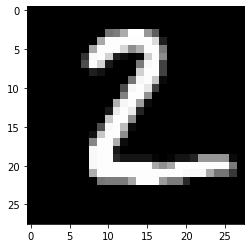

1


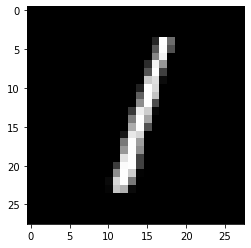

In [4]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img = mnist_train[i][0]
  print(mnist_train[i][1])
  plt.imshow(img[0],cmap='gray')
  plt.show()

torch.Size([1, 1, 28, 28])
7
torch.Size([1, 3, 26, 26])


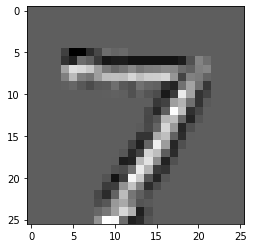

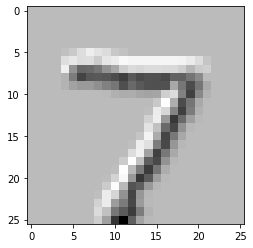

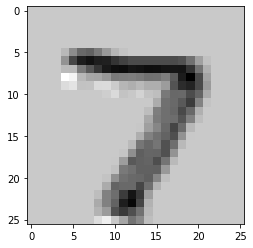

In [5]:
img,label = mnist_train[0]

img = img.unsqueeze(0)
print(img.shape)

print(label)

conv_layer = nn.Conv2d(1,3,kernel_size=3,stride=1)
output = conv_layer(Variable(img))
print(output.shape)

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
  plt.show()

In [17]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
epoch = 10

In [7]:
train_loader = DataLoader(mnist_train,batch_size=batch_size,shuffle=True, num_workers=2,drop_last=True)
test_loader = DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)\

In [14]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1,16,5,padding=2),
        nn.ReLU(),
        
        nn.Conv2d(16,32,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Conv2d(32,64,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100,10)
    )

  def forward(self,x):
    out = self.layer(x)
    out = out.view(batch_size,-1)
    out = self.fc_layer(out)

    return out

model = CNN().cuda()

In [9]:
for parameter in model.parameters():
  print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [25]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

for i in range(epoch):
  for j,(imgs,labels) in enumerate(train_loader):
    imgs = Variable(imgs).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    output= model.forward(imgs)
    loss = loss_func(output,labels)
    loss.backward()
    optimizer.step()

    if j%50==0:
      print(loss,j,i)

tensor(2.3271, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(1.6887, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(1.0377, device='cuda:0', grad_fn=<NllLossBackward>) 100 0
tensor(0.5834, device='cuda:0', grad_fn=<NllLossBackward>) 150 0
tensor(0.4241, device='cuda:0', grad_fn=<NllLossBackward>) 200 0
tensor(0.4936, device='cuda:0', grad_fn=<NllLossBackward>) 250 0
tensor(0.1600, device='cuda:0', grad_fn=<NllLossBackward>) 300 0
tensor(0.2309, device='cuda:0', grad_fn=<NllLossBackward>) 350 0
tensor(0.3398, device='cuda:0', grad_fn=<NllLossBackward>) 400 0
tensor(0.1480, device='cuda:0', grad_fn=<NllLossBackward>) 450 0
tensor(0.0660, device='cuda:0', grad_fn=<NllLossBackward>) 500 0
tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward>) 550 0
tensor(0.1452, device='cuda:0', grad_fn=<NllLossBackward>) 600 0
tensor(0.2513, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.1165, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.1332, device='cuda:0',

In [21]:
torch.save(model,'nets/mycnn_model_%d.pkl'%(epoch))

In [22]:
try:
  model = torch.load('nets/mycnn_model_10.pkl')
  print('model restored')
except:
  print('model not restored')


model restored


In [23]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (imgs, labels) in enumerate(dloader):
            img = Variable(imgs).cuda()
            label = Variable(labels).cuda()

            output = imodel.forward(img)
            _, output_index = torch.max(output,1)

            total+=label.size(0)
            correct+=(output_index==label).sum().float()

        print('Accuracy of Test Data: {}'.format(100*correct/total))

In [26]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 99.90999603271484
